# BEN JACKANY CAPSTONE PROJECT
## FLIGHT DELAYS PREDICTIONS

![fig_06](img/fig_06.png)


### MACHINE LEARNING MODELS ( RANDOM FORESTS - BALANCED DATASET)

### Libraries

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('../Data/dfm.csv')

In [3]:
df

FLIGHT_STATUS  DISTANCE  MONTH_10  MONTH_11  MONTH_12  MONTH_2  \
0                 0.0    1020.0         0         0         0        0   
1                 0.0     214.0         0         0         0        0   
2                 0.0     944.0         0         0         0        0   
3                 0.0    1590.0         0         0         0        0   
4                 0.0    1587.0         0         0         0        0   
...               ...       ...       ...       ...       ...      ...   
697692            0.0    1124.0         0         0         1        0   
697693            0.0     991.0         0         0         1        0   
697694            0.0     903.0         0         0         1        0   
697695            0.0     606.0         0         0         1        0   
697696            0.0     606.0         0         0         1        0   

        MONTH_3  MONTH_4  MONTH_5  MONTH_6  MONTH_7  MONTH_8  MONTH_9  \
0             0        0        0        0        0        0        0   
1             0        0        0        0        0        0        0   
2             0        0        0        0        0        0        0   
3             0        0        0        0        0        0        0   
4             0        0        0        0        0        0        0   
...         ...      ...      ...      ...      ...      ...      ...   
697692        0        0        0        0        0        0        0   
697693        0        0        0        0        0        0        0   
697694        0        0        0        0        0        0        0   
697695        0        0        0        0        0        0        0   
697696        0        0        0        0        0        0        0   

        DAY_OF_WEEK_2  DAY_OF_WEEK_3  DAY_OF_WEEK_4  DAY_OF_WEEK_5  \
0                   0              0              0              1   
1                   0              0              0              1   
2                   0              0              0              1   
3                   0              0              0              1   
4                   0              0              0              1   
...               ...            ...            ...            ...   
697692              0              0              1              0   
697693              0              0              1              0   
697694              0              0              1              0   
697695              0              0              1              0   
697696              0              0              1              0   

        DAY_OF_WEEK_6  DAY_OF_WEEK_7  ORIGIN_ABQ  ORIGIN_AGS  ORIGIN_ALB  \
0                   0              0           0           0           0   
1                   0              0           0           0           0   
2                   0              0           0           0           0   
3                   0              0           0           0           0   
4                   0              0           0           0           0   
...               ...            ...         ...         ...         ...   
697692              0              0           0           0           0   
697693              0              0           0           0           0   
697694              0              0           0           0           0   
697695              0              0           0           0           0   
697696              0              0           0           0           0   

        ORIGIN_ANC  ORIGIN_ATL  ORIGIN_ATW  ORIGIN_AUS  ORIGIN_AVL  \
0                0           0           0           0           0   
1                0           0           0           0           0   
2                0           0           0           0           0   
3                0           0           0           0           0   
4                0           0           0           0           0   
...            ...         ...         ...         ...         ...  

In [4]:
X = df.drop(columns ='FLIGHT_STATUS')

In [5]:
X

DISTANCE  MONTH_10  MONTH_11  MONTH_12  MONTH_2  MONTH_3  MONTH_4  \
0         1020.0         0         0         0        0        0        0   
1          214.0         0         0         0        0        0        0   
2          944.0         0         0         0        0        0        0   
3         1590.0         0         0         0        0        0        0   
4         1587.0         0         0         0        0        0        0   
...          ...       ...       ...       ...      ...      ...      ...   
697692    1124.0         0         0         1        0        0        0   
697693     991.0         0         0         1        0        0        0   
697694     903.0         0         0         1        0        0        0   
697695     606.0         0         0         1        0        0        0   
697696     606.0         0         0         1        0        0        0   

        MONTH_5  MONTH_6  MONTH_7  MONTH_8  MONTH_9  DAY_OF_WEEK_2  \
0             0        0        0        0        0              0   
1             0        0        0        0        0              0   
2             0        0        0        0        0              0   
3             0        0        0        0        0              0   
4             0        0        0        0        0              0   
...         ...      ...      ...      ...      ...            ...   
697692        0        0        0        0        0              0   
697693        0        0        0        0        0              0   
697694        0        0        0        0        0              0   
697695        0        0        0        0        0              0   
697696        0        0        0        0        0              0   

        DAY_OF_WEEK_3  DAY_OF_WEEK_4  DAY_OF_WEEK_5  DAY_OF_WEEK_6  \
0                   0              0              1              0   
1                   0              0              1              0   
2                   0              0              1              0   
3                   0              0              1              0   
4                   0              0              1              0   
...               ...            ...            ...            ...   
697692              0              1              0              0   
697693              0              1              0              0   
697694              0              1              0              0   
697695              0              1              0              0   
697696              0              1              0              0   

        DAY_OF_WEEK_7  ORIGIN_ABQ  ORIGIN_AGS  ORIGIN_ALB  ORIGIN_ANC  \
0                   0           0           0           0           0   
1                   0           0           0           0           0   
2                   0           0           0           0           0   
3                   0           0           0           0           0   
4                   0           0           0           0           0   
...               ...         ...         ...         ...         ...   
697692              0           0           0           0           0   
697693              0           0           0           0           0   
697694              0           0           0           0           0   
697695              0           0           0           0           0   
697696              0           0           0           0           0   

        ORIGIN_ATL  ORIGIN_ATW  ORIGIN_AUS  ORIGIN_AVL  ORIGIN_AVP  \
0                0           0           0           0           0   
1                0           0           0           0           0   
2                0           0           0           0           0   
3                0           0           0           0           0   
4                0           0           0           0           0   
...            ...         ...         ...         ...         ...   
697692           0           0    

In [6]:
y = df['FLIGHT_STATUS']

In [7]:
X.shape

(697697, 254)

In [8]:
y.shape

(697697,)

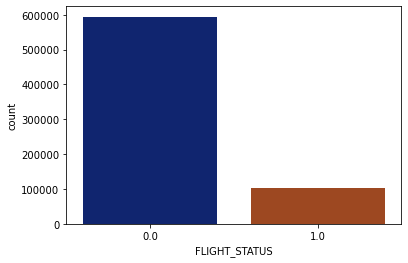

In [9]:
sns.countplot(x="FLIGHT_STATUS", palette="dark", data= df);

In [10]:
ontime = df[df['FLIGHT_STATUS'] ==0 ]
delayed = df[df['FLIGHT_STATUS'] ==1 ]

In [11]:
print(ontime.shape,delayed.shape )

(594172, 255) (103525, 255)


In [12]:
df['FLIGHT_STATUS'].value_counts(normalize= True)

0.0    0.851619
1.0    0.148381
Name: FLIGHT_STATUS, dtype: float64

In [13]:
oversample = SMOTE()

In [14]:
X, y = oversample.fit_resample(X, y)

In [15]:
X.shape

(1188344, 254)

In [16]:
y.shape

(1188344,)

# Random Forests (BALANCED DATASET)

![fig_09](img/fig_09.png)

In [17]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
rfc = RandomForestClassifier( n_estimators=10, max_features= 'auto', random_state= 42)

In [19]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [20]:
preds = rfc.predict(X_test)

In [21]:
preds

array([0., 1., 1., ..., 0., 0., 1.])

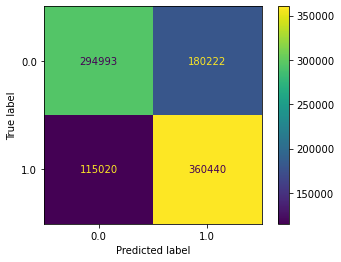

In [22]:
plot_confusion_matrix(rfc, X_test, y_test);

In [23]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.72      0.62      0.67    475215
         1.0       0.67      0.76      0.71    475460

    accuracy                           0.69    950675
   macro avg       0.69      0.69      0.69    950675
weighted avg       0.69      0.69      0.69    950675



In [24]:
rfc.feature_importances_

array([7.05585887e-02, 2.94034506e-02, 3.07991669e-02, 3.35651953e-02,
       3.09471014e-02, 2.48564937e-02, 2.28298160e-02, 2.06211957e-02,
       2.60739697e-02, 3.34608122e-02, 3.28301196e-02, 2.98231069e-02,
       2.93684276e-02, 4.39776149e-02, 4.66936659e-02, 3.92999069e-02,
       3.85027590e-02, 3.64063962e-02, 4.70865822e-04, 2.77050827e-04,
       5.57565146e-04, 1.23139548e-03, 4.16994058e-03, 2.41249388e-04,
       2.64480005e-03, 2.45768305e-04, 3.23389171e-04, 1.30654303e-03,
       7.19949145e-04, 4.78841974e-04, 2.02178691e-04, 1.64921082e-03,
       4.95108872e-04, 2.07839587e-03, 8.17812334e-05, 1.82967752e-04,
       6.58963757e-04, 3.22525417e-04, 1.43043482e-03, 6.76235283e-04,
       5.97927409e-04, 2.74382185e-04, 3.23665961e-04, 3.14724212e-04,
       9.81186934e-04, 2.12159093e-04, 1.19396754e-03, 1.55211868e-03,
       1.04472581e-03, 2.36704488e-04, 1.96280224e-04, 2.51027629e-03,
       7.39810048e-04, 8.70731591e-04, 6.36976950e-04, 2.02970845e-03,
      

In [25]:
pd.DataFrame(index = X.columns, data = rfc.feature_importances_, columns = ["Feature Importance"]).sort_values('Feature Importance')

Feature Importance
ORIGIN_SBN               0.000005
ORIGIN_MTJ               0.000048
ORIGIN_STX               0.000056
ORIGIN_BTR               0.000082
ORIGIN_EGE               0.000086
...                           ...
DAY_OF_WEEK_6            0.038503
DAY_OF_WEEK_5            0.039300
DAY_OF_WEEK_3            0.043978
DAY_OF_WEEK_4            0.046694
DISTANCE                 0.070559

[254 rows x 1 columns]